In [1]:
%%capture
# move to src folder so we can import code
%cd ..

In [2]:
from pets import config
# This import * is an extremely bad practice in modern Python programming. This shouldn’t be done in production
from fastai.vision.all import *

In [3]:
help(untar_data)

Help on function untar_data in module fastai.data.external:

untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'
    Download `url` using `FastDownload.get`



In [4]:
set_seed(config.SEED)

In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/home/jcarnero/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/jcarnero/.fastai/data/oxford-iiit-pet/images')]

In [7]:
(path/'images').ls()[:3]

(#3) [Path('/home/jcarnero/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/home/jcarnero/.fastai/data/oxford-iiit-pet/images/boxer_103.jpg'),Path('/home/jcarnero/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_58.jpg')]

In [8]:
fnames = get_image_files(path / "images")
pat = r"(.+)_\d+.jpg$"

item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.0, 1.0))
batch_tfms = [
    *aug_transforms(size=224, max_warp=0),
    Normalize.from_stats(*imagenet_stats),
]
bs = 64

dls = ImageDataLoaders.from_name_re(
    path,  # The location of the data
    fnames,  # A list of filenames
    pat,  # A regex pattern to extract the labels
    item_tfms=item_tfms,  # Transform augmentations to be applied per item
    batch_tfms=batch_tfms,  # Transform augmentations to be applied per batch
    bs=bs,  # How many examples should be drawn each time
)

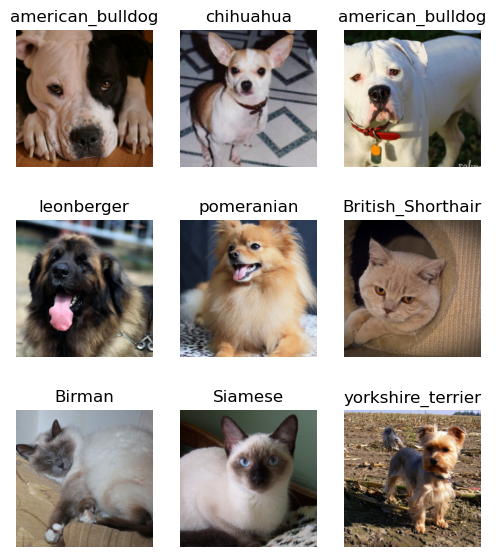

In [9]:
dls.show_batch(max_n=9, figsize=(6,7))

In [10]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [11]:
len(dls.vocab)

37

In [12]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}